In [1]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline

model_id = (
    "diffusers/examples/instruct_pix2pix/instruct-pix2pix-model"  # <- replace this
)
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16
).to("cuda")
generator = torch.Generator("cuda").manual_seed(0)



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

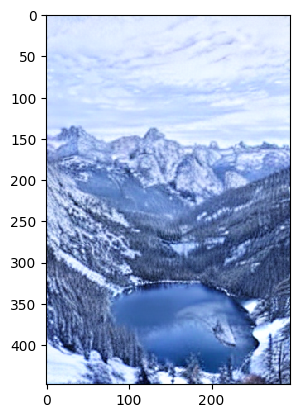

In [4]:
# url = "https://huggingface.co/datasets/sayakpaul/sample-datasets/resolve/main/test_pix2pix_4.png"
url = "https://cdn.britannica.com/97/158797-004-E9F0FBE7/North-Cascades-National-Park-Lake-Ann-park.jpg"


def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image


image = download_image(url)


prompt = "make it winter"
num_inference_steps = 30
image_guidance_scale = 1.5
guidance_scale = 10

edited_image = pipe(
    prompt,
    image=image,
    num_inference_steps=num_inference_steps,
    image_guidance_scale=image_guidance_scale,
    guidance_scale=guidance_scale,
    generator=generator,
).images[0]
# edited_image.save("edited_image.png")
from matplotlib import pyplot as plt

plt.imshow(edited_image, interpolation="nearest")
plt.show()

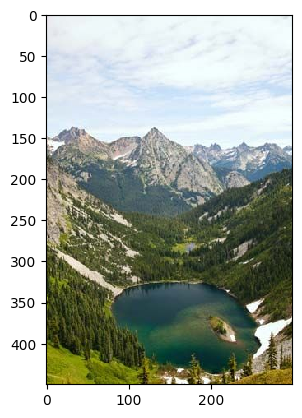

In [5]:
plt.imshow(image, interpolation="nearest")
plt.show()